### Visualizing Time Series Data in Python | 01-Line Plot
#### `01: Load your time series data`

The most common way to import time series data in Python is by using the `pandas` library. You can use the `read_csv()` from `pandas` to read the contents of a file into a DataFrame. This can be achieved using the following command:

`df = pd.read_csv("name_of_your_file.csv")`
Once your data is loaded into Python, you can display the first rows of your DataFrame by calling the `.head(n=5)` method, where `n=5` indicates that you want to print the first five rows of your DataFrame.

In this exercise, you will read in a time series dataset that contains the number of "great" inventions and scientific discoveries from 1860 to 1959, and display its first five rows.

- Import the `pandas` library using the `pd` alias.
- Read in the time series data from the csv file located at `url_discoveries` into a DataFrame called `discoveries`.
- Print the first 5 lines of the DataFrame using the `.head()` method.

In [1]:
url_discoveries = "datasets/ch1_discoveries.csv"
# Import pandas
import pandas as pd

# Read in the file content in a DataFrame called discoveries
discoveries = pd.read_csv(url_discoveries)

# Display the first five lines of the DataFrame
print(discoveries.head())

         date  Y
0  01-01-1860  5
1  01-01-1861  3
2  01-01-1862  0
3  01-01-1863  2
4  01-01-1864  0


#### `02: Test whether your data is of the correct type`
When working with time series data in pandas, any date information should be formatted as a datetime64 type. Therefore, it is important to check that the columns containing the date information are of the correct type. You can check the type of each column in a DataFrame by using the .dtypes attribute. Fortunately, if your date columns come as strings, epochs, etc… you can use the to_datetime() function to convert them to the appropriate datetime64 type:

`df['date_column'] = pd.to_datetime(df['date_column'])`

In this exercise, you will learn how to check the data type of the columns in your time series data and convert a date column to the appropriate datetime type.

- Print out the data type of the column in the discoveries object.

In [2]:
# Print the data type of each column in discoveries
print(discoveries.dtypes)


date    object
Y        int64
dtype: object


- Convert the `date` column in the `discoveries` DataFrame to the `datetime` type.
- Print out the data type of the column in the `discoveries` object again to check that your conversion worked.

In [3]:
# Print the data type of each column in discoveries
print(discoveries.dtypes)

# Convert the date column to a datestamp type
discoveries['date'] = pd.to_datetime(discoveries['date'])

# Print the data type of each column in discoveries, again
print(discoveries.dtypes)

date    object
Y        int64
dtype: object
date    datetime64[ns]
Y                int64
dtype: object


Great work! You've just cleaned the data in the discoveries DataFrame. Let's try and plot it!



#### `03: Your first plot!`
Let's take everything you have learned so far and plot your first time series plot. You will set the groundwork by producing a time series plot of your data and labeling the axes of your plot, as this makes the plot more readable and interpretable for the intended audience.

`matplotlib` is the most widely used plotting library in Python, and would be the most appropriate tool for this job. Fortunately for us, the `pandas` library has implemented a `.plot()` method on Series and DataFrame objects that is a wrapper around `matplotlib.pyplot.plot()`, which makes it easier to produce plots.

- Set the `'date'` column as the index of your DataFrame.
- Using the `discoveries` DataFrame, plot the time series in your DataFrame using a "blue" line plot and assign it to `ax`.
- Specify the x-axis label on your plot: `'Date'`.
- Specify the y-axis label on your plot: `'Number of great discoveries'`.

In [4]:
import matplotlib.pyplot as plt 

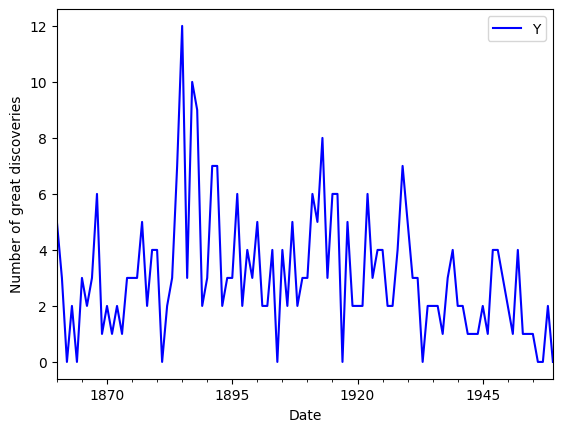

In [5]:
# Set the date column as the index of your DataFrame discoveries
discoveries = discoveries.set_index("date")

# Plot the time series in your DataFrame
ax = discoveries.plot(color='blue')

# Specify the x-axis label in your plot
ax.set_xlabel('Date')

# Specify the y-axis label in your plot
ax.set_ylabel('Number of great discoveries')

# Show plot
plt.show()

- Awesome! It looks like the largest number of great discoveries happened during the year of 1885.



#### `04: Specify plot styles`
The `matplotlib` library also comes with a number of built-in stylesheets that allow you to customize the appearance of your plots. To use a particular style sheet for your plots, you can use the command `plt.style.use(your_stylesheet)` where `your_stylesheet` is the name of the style sheet.

In order to see the list of available style sheets that can be used, you can use the command `print(plt.style.available)`. For the rest of this course, we will use the awesome `fivethirtyeight` style sheet.

- Import `matplotlib.pyplot` using its usual alias `plt`.
- Use the `fivethirtyeight` style sheet to plot a line plot of the `discoveries` data

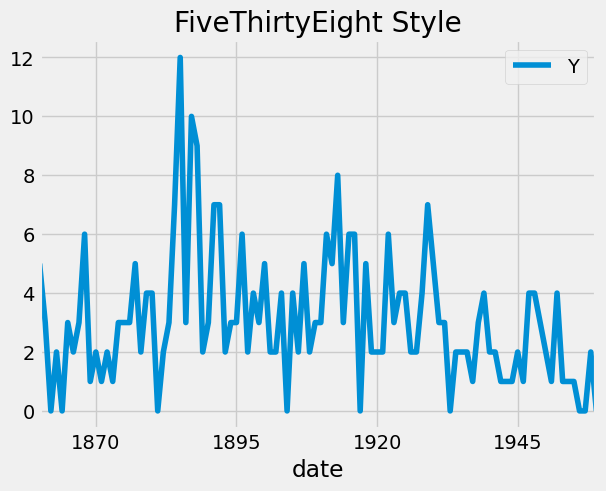

In [6]:
# Import the matplotlib.pyplot sub-module
import matplotlib.pyplot as plt

# Use the fivethirtyeight style
plt.style.use('fivethirtyeight')

# Plot the time series
ax1 = discoveries.plot()
ax1.set_title('FiveThirtyEight Style')
plt.show()

- Use the `ggplot` style sheet to plot a line plot of the `discoveries` data.
- Set the title of your second plot as `'ggplot Style'`.

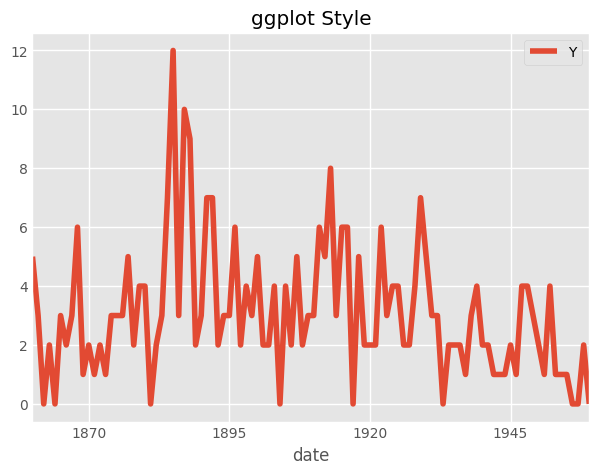

In [8]:
# Import the matplotlib.pyplot sub-module
import matplotlib.pyplot as plt

# Use the ggplot style
plt.style.use('ggplot')
ax2 = discoveries.plot()

# Set the title
ax2.set_title('ggplot Style')
plt.show()

#### `05: Display and label plots`
As you saw earlier, if the index of a `pandas` DataFrame consists of dates, then `pandas` will automatically format the x-axis in a human-readable way. In addition the `.plot()` method allows you to specify various other parameters to tailor your time series plot (color of the lines, width of the lines and figure size).

You may have noticed the use of the notation `ax = df.plot(...)` and wondered about the purpose of the `ax` object. This is because the `plot` function returns a `matplotlib` AxesSubplot object, and it is common practice to assign this returned object to a variable called ax. Doing so also allows you to include additional notations and specifications to your plot such as axis labels.


Display a line chart of the `discoveries` DataFrame.

- Specify the color of the line as `'blue'`.
- Width of the line as 2.
- The dimensions of your plot to be of length 8 and width 3.
- Specify the `fontsize` of 6.

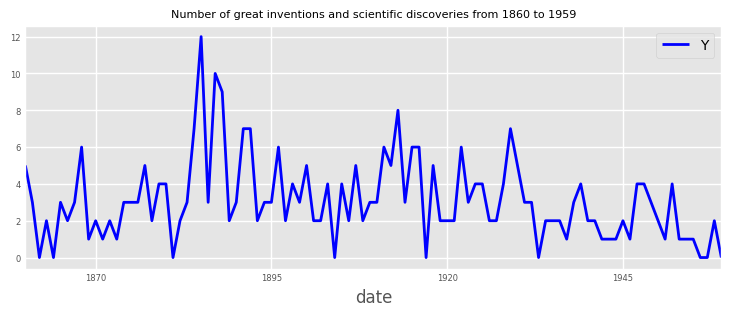

In [9]:
# Plot a line chart of the discoveries DataFrame using the specified arguments
ax = discoveries.plot(color='blue', figsize=(8, 3), linewidth=2, fontsize=6)

# Specify the title in your plot
ax.set_title('Number of great inventions and scientific discoveries from 1860 to 1959', fontsize=8)

# Show plot
plt.show()

#### `06: Subset time series data`
When plotting time series data, you may occasionally want to visualize only a subset of the data. The pandas library provides powerful indexing and subsetting methods that allow you to extract specific portions of a DataFrame. For example, you can subset all the data between 1950 and 1960 in the discoveries DataFrame by specifying the following date range:

`subset_data = discoveries['1950-01-01':'1960-01-01']`
Note: Subsetting your data this way is only possible if the index of your DataFrame contains dates of the `datetime` type. Failing that, the `pandas` library will return an error message.

- Use `discoveries` to create a new DataFrame `discoveries_subset_1` that contains all the data between January 1, 1945 and January 1, 1950.
- Plot the time series of `discoveries_subset_1` using a "blue" line plot.


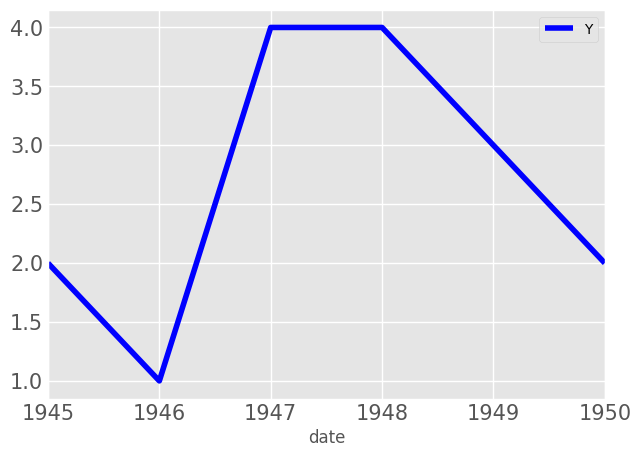

In [10]:
# Select the subset of data between 1945 and 1950
discoveries_subset_1 = discoveries['1945-01-01':'1950-01-01']

# Plot the time series in your DataFrame as a blue area chart
ax = discoveries_subset_1.plot(color='blue', fontsize=15)

# Show plot
plt.show()

- Use `discoveries` to create a new DataFrame `discoveries_subset_2` that contains all the data between January 1, 1939 and January 1, 1958.
- Plot the time series of `discoveries_subset_2` using a "blue" line plot.

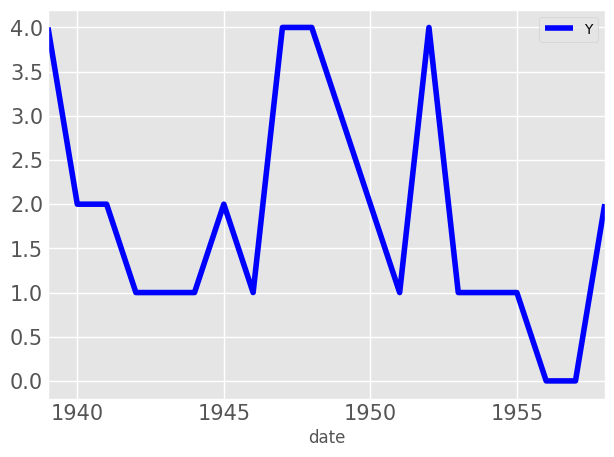

In [11]:
# Select the subset of data between 1939 and 1958
discoveries_subset_2 = discoveries["1939-01-01":"1958-01-01"]

# Plot the time series in your DataFrame as a blue area chart
ax = discoveries_subset_2.plot(color='blue', fontsize=15)

# Show plot
plt.show()

- Nice! It looks like there were no great discoveries in 1956 and 1957!



#### `07: Add vertical and horizontal markers`
Additional annotations can help further emphasize specific observations or events. Here, you will learn how to highlight significant events by adding markers at specific timestamps of your time series plot. The matplotlib library makes it possible to draw vertical and horizontal lines to identify particular dates.

Recall that the index of the discoveries DataFrame are of the datetime type, so the x-axis values of a plot will also contain dates, and it is possible to directly input a date when annotating your plots with vertical lines. For example, a vertical line at January 1, 1945 can be added to your plot by using the command:

`ax.axvline('1945-01-01', linestyle='--')`

- Add a red vertical line at the date January 1, 1939 using the `.axvline()` method.
- Add a green horizontal line at the y-axis value `4` using the `.axhline()` method.

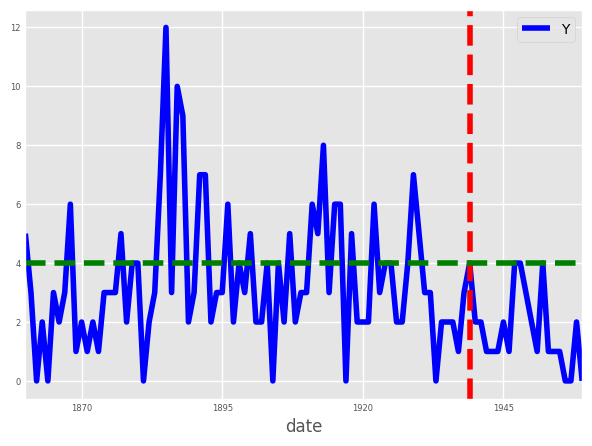

In [12]:
# Plot your the discoveries time series
ax = discoveries.plot(color='blue', fontsize=6)

# Add a red vertical line
ax.axvline('1939-01-01', color='red', linestyle='--')

# Add a green horizontal line
ax.axhline(4, color='green', linestyle='--')

plt.show()

Great work! Adding vertical and horizontal markers to a graph is a powerful feature, so hopefully it will be helpful to you!



#### `08: Add shaded regions to your plot`
When plotting time series data in Python, it is also possible to highlight complete regions of your time series plot. In order to add a shaded region between January 1, 1936 and January 1, 1950, you can use the command:

`ax.axvspan('1936-01-01', '1950-01-01', color='red' , alpha=0.5)`
Here we specified the overall transparency of the region by using the `alpha` argument (where `0` is completely transparent and `1` is full color).

- Use the `.axvspan()` method to add a vertical red shaded region between the dates of January 1, 1900 and January 1, 1915 with a transparency of `0.3`.
- Use the `.axhspan()` method to add a horizontal green shaded region between the values of 6 and 8 with a transparency of `0.3`.

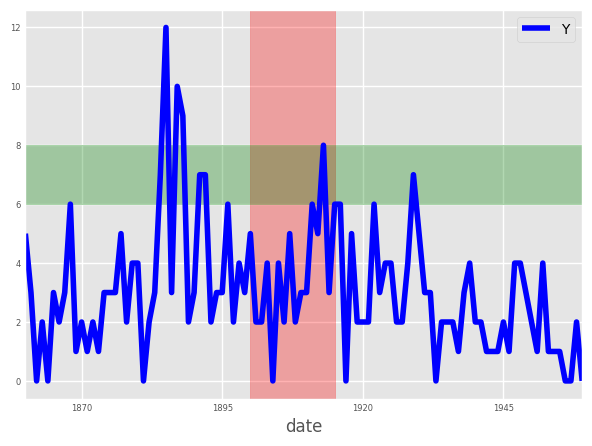

In [13]:
# Plot your the discoveries time series
ax = discoveries.plot(color='blue', fontsize=6)

# Add a vertical red shaded region
ax.axvspan('1900-01-01', '1915-01-01', color='red', alpha=0.3)

# Add a horizontal green shaded region
ax.axhspan(6, 8, color='green', alpha=0.3)

plt.show()